<a target="_blank" href="https://colab.research.google.com/github/piavik/Prognosis/blob/dev/experiments/LinearRegression.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [2]:
# # створення датасету з файлу
# df = pd.read_csv('internet_service_churn.csv')

In [8]:
df = pd.read_csv('../datasets/processed_dataset.csv')

# Data cleaning

In [9]:
df.describe()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,download_avg,upload_avg,churn
count,71882.000000,71882.000000,71882.000000,71882.000000,71882.000000,71882.000000,71882.000000,71882.000000
mean,0.815308,0.334103,2.455431,18.960964,0.497667,43.492609,4.174503,0.557163
std,0.388050,0.471679,2.026719,12.383929,0.665780,58.734734,9.693839,0.496725
min,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.940000,13.000000,0.000000,6.700000,0.500000,0.000000
50%,1.000000,0.000000,1.980000,19.000000,0.000000,27.800000,2.100000,1.000000
75%,1.000000,1.000000,3.300000,22.000000,1.030000,60.400000,4.800000,1.000000
max,1.000000,1.000000,12.800000,285.000000,2.920000,3179.800000,453.300000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71882 entries, 0 to 71881
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             71882 non-null  int64  
 1   is_movie_package_subscriber  71882 non-null  int64  
 2   subscription_age             71882 non-null  float64
 3   bill_avg                     71882 non-null  int64  
 4   reamining_contract           71882 non-null  float64
 5   download_avg                 71882 non-null  float64
 6   upload_avg                   71882 non-null  float64
 7   churn                        71882 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 4.4 MB


In [11]:
df.isna().sum()

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
download_avg                   0
upload_avg                     0
churn                          0
dtype: int64

In [6]:
# # Create 'is_contract' column: 1 if 'reamining_contract' is not null, else 0
# df['is_contract'] = df['reamining_contract'].notna().astype(int)

# # Replace nulls in 'reamining_contract' with 0
# df['reamining_contract'] = df['reamining_contract'].fillna(0)

# # Define the desired column order
# column_names = [
#     'id', 'is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age',
#     'bill_avg', 'reamining_contract', 'is_contract', 'service_failure_count',
#     'download_avg', 'upload_avg', 'download_over_limit', 'churn'
# ]

# # Reorder the DataFrame columns
# df = df[column_names]

In [14]:
df.head(10)

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,download_avg,upload_avg,churn
0,1,0,11.95,25,0.14,8.4,2.3,0
1,0,0,8.22,0,0.00,0.0,0.0,1
2,1,0,8.91,16,0.00,13.7,0.9,1
3,0,0,6.87,21,0.00,0.0,0.0,1
4,0,0,6.39,0,0.00,0.0,0.0,1
5,1,1,11.94,32,1.38,69.4,4.0,0
6,0,0,8.96,18,0.00,21.3,2.0,1
7,0,0,5.48,14,0.00,0.0,0.0,1
8,0,0,8.54,0,0.00,0.0,0.0,1
9,0,0,8.33,0,0.00,0.0,0.0,1


In [15]:
df.isna().sum()

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
download_avg                   0
upload_avg                     0
churn                          0
dtype: int64

In [9]:
# # Replace empty strings with NaN in 'download_avg' and 'upload_avg' columns
# df[['download_avg', 'upload_avg']] = df[['download_avg', 'upload_avg']].replace('', np.nan)

# # Drop rows where either 'download_avg' or 'upload_avg' is NaN
# df.dropna(subset=['download_avg', 'upload_avg'], inplace=True)

In [16]:
# df.isna().sum()

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
download_avg                   0
upload_avg                     0
churn                          0
dtype: int64

# EDA

## Churn

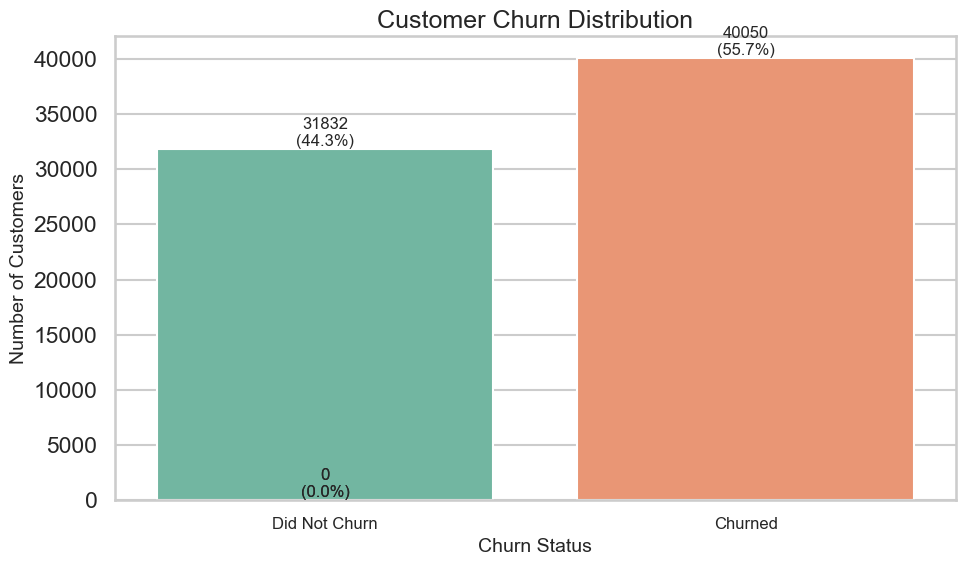

In [17]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10, 6))

# Create the count plot with 'churn' as both x and hue variables
ax = sns.countplot(data=df, x='churn', hue='churn', palette='Set2', dodge=False)

plt.title("Customer Churn Distribution", fontsize=18)
plt.xlabel("Churn Status", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)

ax.legend_.remove()

ax.set_xticks([0, 1])  # Positions corresponding to 'churn' categories
ax.set_xticklabels(['Did Not Churn', 'Churned'], fontsize=12)

# Annotate each bar with the count and percentage
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = count
    ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom', fontsize=12)

plt.tight_layout()

plt.show()

There is imbalance in the data with 40050 who has churned & 31843 who has not churned.

## Comparison of Subscribers

In [18]:
df[["is_tv_subscriber","is_movie_package_subscriber"]].sum()

is_tv_subscriber               58606
is_movie_package_subscriber    24016
dtype: int64

In [19]:
subscription_counts = pd.crosstab(df['is_tv_subscriber'], df['is_movie_package_subscriber'])
subscription_counts

is_movie_package_subscriber,0,1
is_tv_subscriber,,
0,13274,2
1,34592,24014



Comparison of Subscribers:
  * There are more customers with TV subscriptions than those with movie package subscriptions.

Movie-Only Subscribers:
  * Only two customers have opted for the movie package without a TV subscription. Generally, customers who subscribe to the movie package also have a TV subscription.

Subscription Statistics:
  * A total of 13,282 customers did not opt for either TV or movie subscriptions.
  * 24,015 customers opted for both TV and movie subscriptions.

## Is TV subscribers cousing churn

[Text(0.5, 0, 'Tv subscriber or not')]

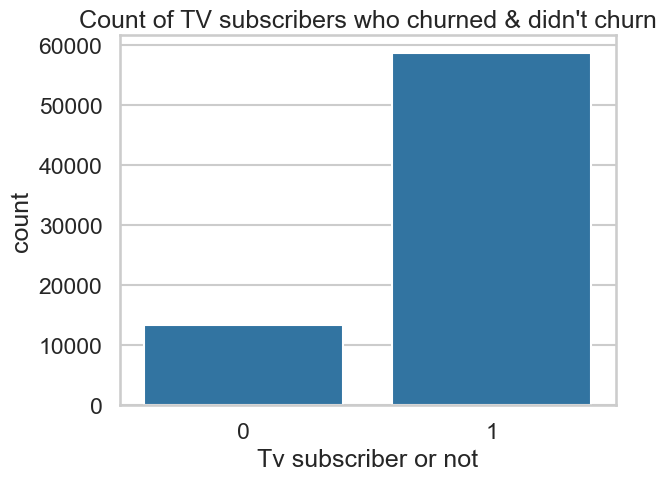

In [20]:
plt.title("Count of TV subscribers who churned & didn't churn")
ax = sns.countplot(x = 'is_tv_subscriber', data = df)
ax.set(xlabel='Tv subscriber or not')

## Is movie subscribers causing churn?

[Text(0.5, 0, 'Movie subscriber or not')]

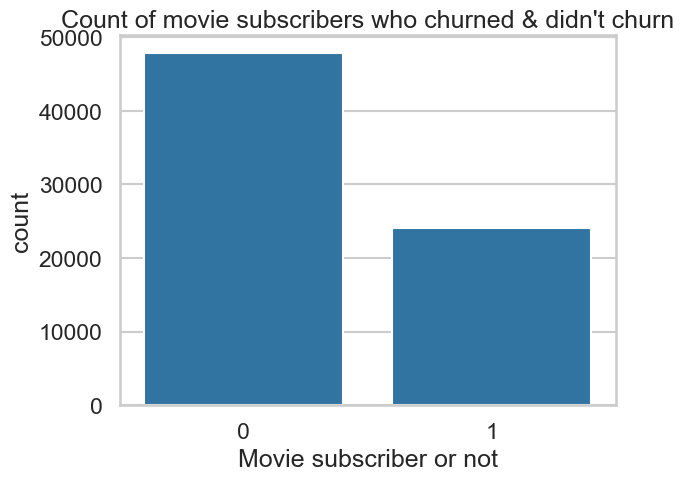

In [21]:
plt.title("Count of movie subscribers who churned & didn't churn")
ax = sns.countplot(x = 'is_movie_package_subscriber', data = df)
ax.set(xlabel='Movie subscriber or not')

# Modeling

## Logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
)

# Select features and target variable
# X = df[
#     [
#         'is_tv_subscriber',
#         'subscription_age',
#         'service_failure_count',
#         'download_avg',
#         'is_contract',
#         'bill_avg',
#         'reamining_contract',
#     ]
# ]
X = df.drop(columns=['churn'])
y = df['churn']

# Split the data into training and validation sets with stratification
X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size=0.8, random_state=42, stratify=y
)

# Define the preprocessing and modeling pipeline
pipeline = Pipeline(
    [
        ('scaler', StandardScaler()),  # Feature scaling
        (
            'logistic',
            LogisticRegression(
                solver='liblinear',
                class_weight='balanced',
                random_state=2,
                max_iter=1000,
            ),
        ),
    ]
)

In [34]:
# Define hyperparameter grid for GridSearchCV
param_grid = {
    'logistic__C': np.logspace(-4, 4, 20),  # Regularization strength
    'logistic__penalty': ['l1', 'l2'],      # Regularization type
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1
)

# Fit the model using grid search to find the best parameters
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=2,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logistic__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [35]:
# Print the best parameters found
print("Best parameters from GridSearchCV:")
print(grid_search.best_params_)

Best parameters from GridSearchCV:
{'logistic__C': 0.00026366508987303583, 'logistic__penalty': 'l1'}


In [36]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the model on the validation set
y_pred = best_model.predict(X_val)
y_proba = best_model.predict_proba(X_val)[:, 1]

In [37]:
# Print evaluation metrics
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_val, y_pred)
print(conf_matrix)

print("ROC AUC Score:")
roc_auc = roc_auc_score(y_val, y_proba)
print(f"{roc_auc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      6367
           1       0.83      0.93      0.88      8010

    accuracy                           0.85     14377
   macro avg       0.86      0.85      0.85     14377
weighted avg       0.86      0.85      0.85     14377

Confusion Matrix:
[[4873 1494]
 [ 599 7411]]
ROC AUC Score:
0.9355


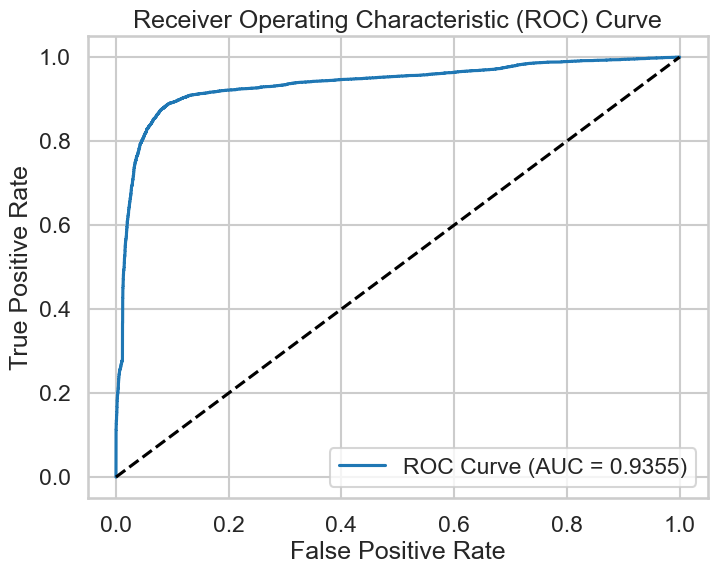

In [38]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

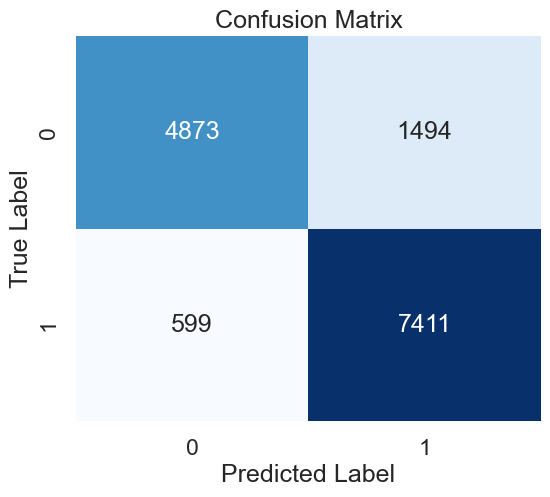

In [39]:
# Plot Confusion Matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [40]:
# Get feature names and coefficients
feature_names = X.columns
coefficients = best_model.named_steps['logistic'].coef_[0]

# Create a DataFrame of features and their coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)

print("\nFeature Coefficients:")
print(coef_df[['Feature', 'Coefficient']])


Feature Coefficients:
                       Feature  Coefficient
4           reamining_contract    -1.320237
5                 download_avg    -0.187756
0             is_tv_subscriber    -0.142822
2             subscription_age    -0.004916
1  is_movie_package_subscriber     0.000000
3                     bill_avg     0.000000
6                   upload_avg     0.000000


In [43]:
import joblib

joblib.dump(best_model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

## Random forest

In [26]:
# from sklearn.ensemble import RandomForestClassifier

# param_grid_rf = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# # Create GridSearchCV object
# grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
#                            scoring='accuracy', cv=5, n_jobs=-1)

# # Fit the model to the data
# grid_search_rf.fit(X_train, y_train)

# # Print the best parameters
# print("Best Parameters:", grid_search_rf.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [29]:
# y_pred1 = grid_search_rf.best_estimator_.predict(X_val)

# print(classification_report(y_val, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      9553
           1       0.96      0.93      0.95     12015

    accuracy                           0.94     21568
   macro avg       0.94      0.94      0.94     21568
weighted avg       0.94      0.94      0.94     21568



In [28]:
# import joblib

# # Save the best model to a file
# joblib.dump(grid_search_rf.best_estimator_, 'random_forest_model.pkl')

['random_forest_model.pkl']